In [34]:
import itertools
from tqdm import tqdm
from time import sleep
from time import time
from math import sqrt
from multiprocessing import Pool
from itertools import product, repeat
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from qutip import *
from scipy.signal import peak_widths
from scipy.optimize import curve_fit
from functools import partial
import warnings
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import numpy.linalg
import os, sys
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from os import devnull
import matplotlib.animation as animation
import pickle
import matplotlib.ticker as mtick
plt.style.use('ggplot')
cols = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}\usepackage{nicefrac}')
plt.rcParams.update({'font.size': 35,
                     'figure.figsize': (11,7),
                     # 'axes.facecolor': 'white',
                     "figure.autolayout": 'True',
                     # 'axes.xmargin': 0.03,
                     # 'axes.ymargin': 0.05,
                     'axes.grid': False,
                     'axes.linewidth': 0,
                     'lines.markersize': 14,
                     'text.usetex': True,
                     'lines.linewidth': 8,
                     "legend.frameon": True,
                     "legend.framealpha": 0.5,
                     # "legend.handletextpad": 1,
                     "legend.edgecolor": "black",
                     # "legend.handlelength": 1,
                     # "legend.labelspacing": 0,
                     # "legend.columnspacing": 1,
                     # "legend.fontsize": 35,
                    })
linestyles = ["-", "--", ":"]

In [35]:
def solve_MF_eq(beta_J_z):
    m_test = 1
    diff = m_test - np.tanh(beta_J_z * m_test / 2)
    m_inc = -np.sign(diff) * 0.1
    while abs(m_inc) > 1e-10:
        while m_inc * diff < 0:
            m_test += m_inc
            diff = m_test - np.tanh(beta_J_z * m_test / 2)
        m_inc /= -2
    return m_test

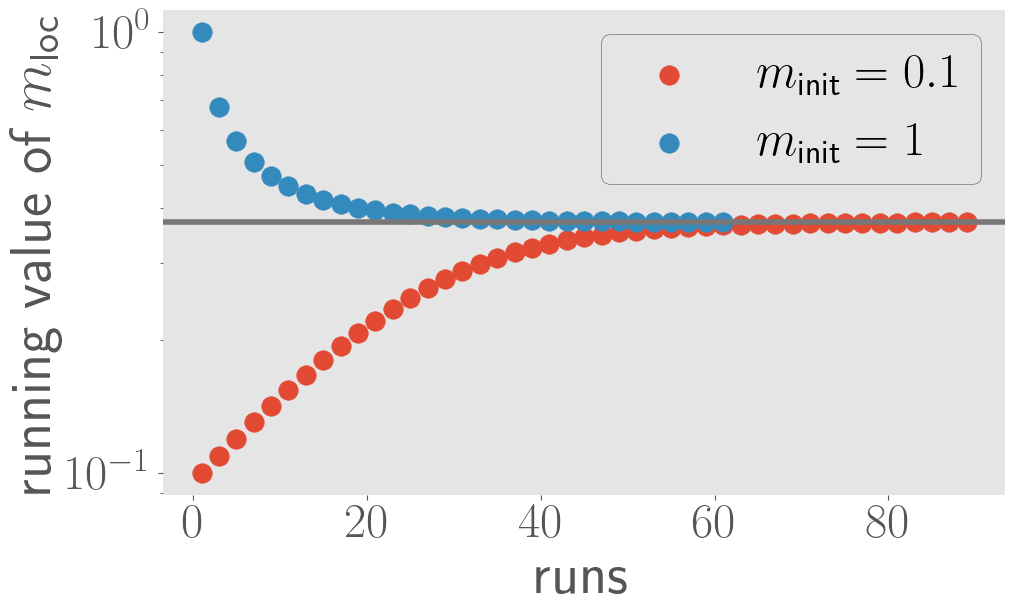

In [37]:
beta_J_z = 2.1
num_sol = solve_MF_eq(beta_J_z)
plt.axhline(num_sol, 0, 1, lw=4, color=cols[3])
for m_loc_init in [0.1, 1]:
    m_arr = []
    m_loc = m_loc_init
    x_arr = []
    i = 0
    while abs(m_loc - num_sol)/m_loc > 1e-3:
        i += 1
        m_arr.append(m_loc)
        x_arr.append(i)
        m = np.tanh(beta_J_z * m_loc / 2)
        m_loc = m
    plt.scatter(x_arr[::2], m_arr[::2], label=r"$m_\text{{init}}={}$".format(m_loc_init))
plt.ylabel(r"running value of $m_\text{loc}$")
plt.xlabel(r"runs")
plt.legend()
plt.yscale("log")
plt.savefig("./ising_selfconsistency.pdf", bbox_inches='tight')